# Numerical Optimization Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package **SciPy**. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function that has the minimal point at [1,1]. (https://en.wikipedia.org/wiki/Rosenbrock_function) We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer to the information in the following link: https://docs.scipy.org/doc/scipy/reference/optimize.html
2. Please apply SciPy library of the optimization algorithm of _BFGS_, _Conjugate Gradient_, _Modified Newton's method with conjugate gradient_ with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer to page 11 of unit 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer to page 18 of unit 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm.
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/, and Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw1_110xxxxxx.ipynb)
7. Please make sure that clicking "Restart & Run All" will give the result you want to show.

## Import packages and visualization
If you imported extra packages, please mention in your report.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [ ]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


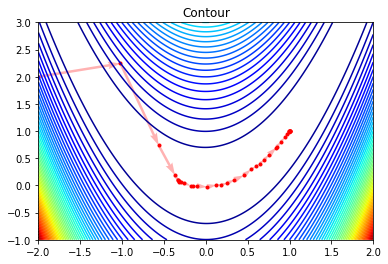

In [ ]:
from re import X
x0 = np.array([-2,2])

x_iter = list() # a list which contains new x for each step of iteration
# TODO (HINT: Hessian will NOT be used in this optimize function)

result = minimize(rosen,x0,jac = rosen_der, method='BFGS',options={'return_all': True,'disp': True})
for i in result.allvecs:
  x_iter.append(i)


visualize(x_iter)

## Conjugate Gradient (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 78
         Gradient evaluations: 78


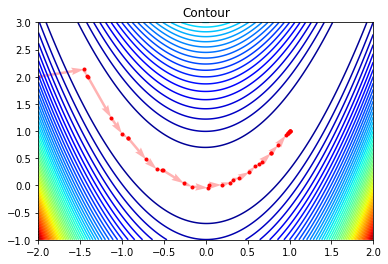

In [ ]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
result = minimize(rosen,x0,jac = rosen_der, method='CG',options={'return_all': True,'disp': True})
for i in result.allvecs:
  x_iter.append(i)

visualize(x_iter)

## Modified Newton's method with conjugate gradiet (Newton-CG) (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 275
         Function evaluations: 296
         Gradient evaluations: 296
         Hessian evaluations: 275


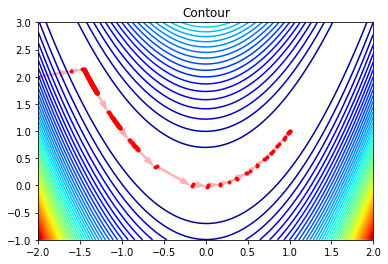

In [ ]:
x0 = np.array([-2,2])
x_iter = list()
## TODO (HINT:You will need to feed in rosen_hess in this optimize function)
result = minimize(rosen,x0,jac = rosen_der,hess = rosen_hess, method='Newton-CG',options={'return_all': True,'disp': True})
for i in result.allvecs:
  x_iter.append(i)

visualize(x_iter)

## Gradient Descent with optimal step length (20%)

In [ ]:
from numpy import linalg as la
from scipy import optimize
def Gradient_Descent(Grad, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # step_length: a list which contains the optimal step length for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence
    
    x_iter = list()
    step_length = list()
    iter_count = 1
    x_iter.append(x)
    def f(t):
      return rosen(x-t*Grad(x))
      
    while la.norm(Grad(x)) > epsilon and iter_count < nMax:
      min = optimize.fmin(f,0.001)
      x = x - min*Grad(x)
      x_iter.append(x)
      iter_count += 1
    return x_iter, iter_count

串流輸出內容已截斷至最後 5000 行。
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluations: 2
Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 1
         Function evaluatio

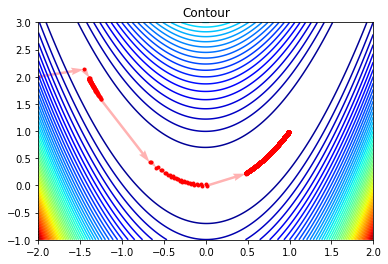

In [ ]:
x0 = np.array([-2,2])
x_iter, iter_count = Gradient_Descent(rosen_der,x0)
print('Iteration Count: %d\n' % iter_count)
print('At ', x_iter[-1], ', the function value is ', rosen(x_iter[-1]), sep='')
visualize(x_iter)

## Pure Newton's Method (20%)

In [ ]:
def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix
    x_iter = list()
    iter_count = 1
    x_iter.append(x)
    while la.norm(Grad(x)) > epsilon and iter_count < nMax :
      h_inv = la.inv(Grad2(x))
      x = x - h_inv.dot(Grad(x))
      x_iter.append(x)
      iter_count += 1
    return x_iter, iter_count

Iteration Count: 6

At [1. 1.], the function value is 1.8096246201576487e-19


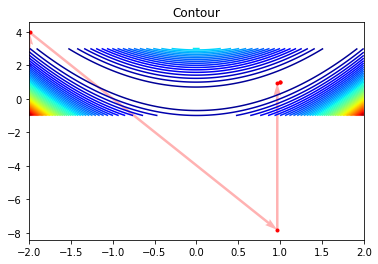

In [ ]:
x0 = np.array([-2,2])
x_iter, iter_count = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
print('At ', x_iter[-1], ', the function value is ', rosen(x_iter[-1]), sep='')
visualize(x_iter)

## Report (30%)

>BFGS

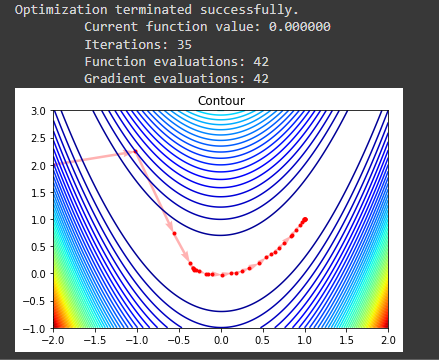

>Conjugate Gradient

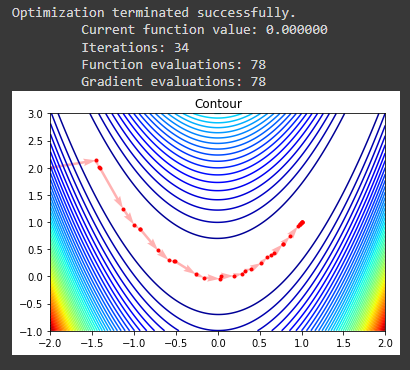

>Modified Newton's method with conjugate gradiet

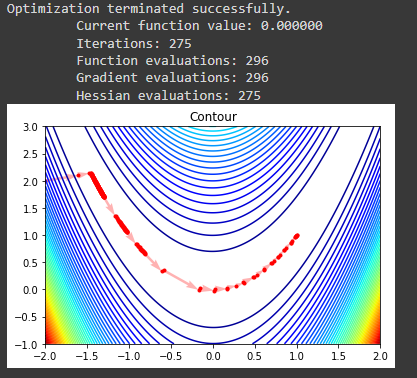

>Pure Newton's Method

>>此為最佳解法，只要六步即可達到目標，可以看出其走的幅度非常的大，但最後還是可以快速的收斂到0的位置

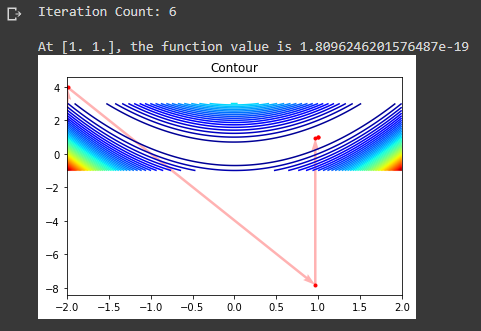

>Gradient Descent with optimal step length

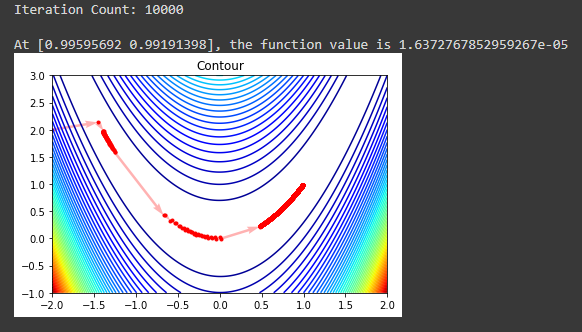

>前面所使用的兩種安裝包，第一個為了較簡單的線性代數運算，第二個為了可以直接尋找最小值最快的方法

>Gradient descent with optimal step
>>根據課本上的公式，可以得知如何獲得optimal_step，藉由定義f(t)，然後帶入原本的rosen function，即可獲得最小值t，依靠optimize function得應用。

>Pure Newton's Method
>>根據newton method分別先算出一次微分與二次微分，再將其相除，這邊使用.dot()，即為矩陣相乘，會得到(2,1)的矩陣，在做相減即可得到新的x位置

